Lecture 10 - outliers and ordinal data

Announcements
1. Problem set 5 and Quiz 5 due on Sunday!

Last class, we talked about how to identify outliers, but we didn't actually remove them! So, let's do that. Let's also make an ordinal column for our horsepower. So, that way, we have a couple of different tests of it

1. Remove outliers
2. Ordinal data for horsepower
3. Intro into Machine Learning!
4. Quiz 4 review

As always, let's load our libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Here is our filename

In [2]:
filename = 'dummed_coded_data.csv'

Now I will load the filename. Note that I messed up saving last time, so I had to resave the data. Just note that I saved the csv with the input argument "index = False" so I didn't want to worry about the index column in my datafile. Nice!

In [3]:
data = pd.read_csv(filename,index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'dummed_coded_data.csv'

In [4]:
data.head()

NameError: name 'data' is not defined

Like before. Let's look at our boxplots of the data to get an idea of the outliers

NameError: name 'data' is not defined

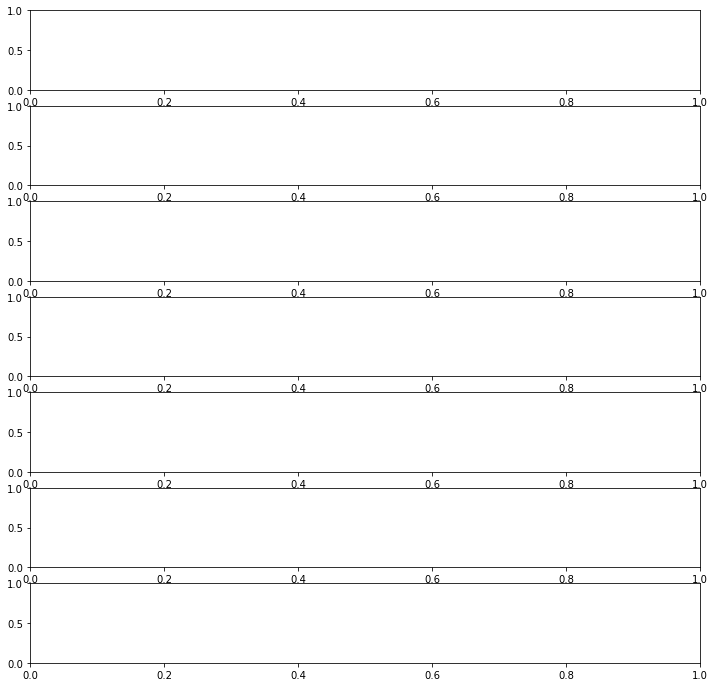

In [5]:
fig,axes = plt.subplots(7,1,figsize=(12,12))

count = 0
for column in data.columns:
  if isinstance(data[column][0],float)==1:
    sns.boxplot(x = data[column],ax=axes[count])
    count = count + 1

plt.tight_layout()

We talked about two methods to remove these outliers

1. multiple of the standard deviation
2. outside of IQR which is basically what the boxplot is doing 

A third method is domain knowledge (e.g., you bring in your own experience to say "hey, this is the threshold of what an outlier is based on what I know about this topic) but this is less common and someone will always ask that you compute outliers

Let's just make a copy so we can hold onto our original data

In [6]:
data2 = data.copy()

NameError: name 'data' is not defined

Here, let's make a function that can detect outliers for us. Its using that IQR method we talked about, where values outside of these boundsa are considered outliers

In [7]:
def remove_outliers(ser):

  Q1 = ser.quantile(.25)
  Q3 = ser.quantile(.75)
  IQR = Q3-Q1

  return np.where((ser > (Q3+(IQR*1.5))) | (ser < (Q1-(IQR*1.5))),np.nan,ser)

And we can then run our function for each column in our dataframe

In [8]:
for column in data2.columns:
  if isinstance(data2[column][0],float)==1: # this checks strings but also means we don't go through the dummy coded columns!
    data2[column] = remove_outliers(data2[column])

NameError: name 'data2' is not defined

In [9]:
data2.describe()

NameError: name 'data2' is not defined

But, you see, we have this problem where displacement still has a negative value. That's not good. Let's fix that

In [10]:
data2 = data.copy()

NameError: name 'data' is not defined

We are basically running the same code as before, but I added another check to make sure the data is positive

In [11]:
def remove_outliers(ser):

  # basically, us using some domain knowledge!
  ser = pd.Series(np.where(ser < 0,np.nan,ser)) 
  ser = pd.Series(np.where(ser >20000,np.nan,ser))

  Q1 = ser.quantile(.25)
  Q3 = ser.quantile(.75)
  IQR = Q3-Q1

  return np.where((ser > (Q3+(IQR*1.5))) | (ser < (Q1-(IQR*1.5))),np.nan,ser)

In [12]:
for column in data2.columns:
  if isinstance(data2[column][0],float)==1: # this checks strings but also means we don't go through the dummy coded columns!
    data2[column] = remove_outliers(data2[column])

NameError: name 'data2' is not defined

In [13]:
data2.describe()

NameError: name 'data2' is not defined

Much better! 

Let's visualize our outliers, which should now be NaNs

In [14]:
sns.heatmap(data2.isnull(),cmap=['Green','Red'])

NameError: name 'data2' is not defined

In this case, let's just remove them. Note I'm using inplace which means this line of code will take the place of my other one

In [15]:
data2.dropna(inplace=True)

NameError: name 'data2' is not defined

Note that I am also going to change the indexes to be 0,1,2,3..... That way, I don't have to worry about my indexes having missing values

In [16]:
data2.index = np.arange(0,data2.shape[0])

NameError: name 'data2' is not defined

Let's add an ordinal column of the horsepower data

That way, we will have the following:

1. original data
2. binned data that was dummy coded into separate columns
3. binned data that was kept in the same column

The difference is that with ordinal, its just a single column. The numbers have meaning - they specify rank. But the difference between the numbers is not meaning

I'm going to create this new column using a for loop and taking advantage of my dummy coded columns

In [17]:
hp_ordinal = []
for row in np.arange(0,data2.shape[0]):

  if (data2['MediumHP'][row] == 0) & (data2['HighHP'][row] == 0):
    hp_ordinal.append(1)
  elif data2['MediumHP'][row] == 1:
    hp_ordinal.append(2)
  elif data2['HighHP'][row] == 1:
    hp_ordinal.append(3)

NameError: name 'data2' is not defined

Now, I will insert it into my dataframe. I could have created a separate dataframe then concatenated, but that seems a bit too much extra work!

In [18]:
data2.insert(len(data2.columns),'HP_ordinal',hp_ordinal,)

NameError: name 'data2' is not defined

Let's check it out by looking at the head

In [19]:
data2.head(20)

NameError: name 'data2' is not defined

And lastly, let's check our final dataframe

In [20]:
data2.describe()

NameError: name 'data2' is not defined

In [21]:
data2.info()

NameError: name 'data2' is not defined

In [22]:
sns.heatmap(data2.isnull())

NameError: name 'data2' is not defined

Now let's save the data!

In [23]:
data2.to_csv('final_mpg_dataset.csv',index=False)

NameError: name 'data2' is not defined

So, in conclusion, that was a crash course in how to do feature engineering. There is obviously more one could do, but this covers most of the basic things.

When thinking about an order to do these things, I think the following order is pretty good:

1. remove duplicates

2. remove erroneous data entries (e.g., outliers that are obviously incorrect)

3. remove outliers using IQR or standard deviation

4. replace missing data or remove rows with missing data

5. Dummy coding, binning, etc etc